In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df_reddit_combi = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//Stress Test//Reddit_Combi.csv", sep =';')
df_twitter = pd.read_csv("C://Users//het14//A. GFG DataScience//Data//Stress Test//Twitter_ Non-Advert-Tabelle 1.csv", sep = ';')

In [40]:
df_reddit_combi.head()

,title,body,Body_Title,label,Unnamed: 4
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1,NaN
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1,NaN
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,Almost 49 and the chasm of emptiness has never...,1,NaN
3,I’m happy again,"After my closest friend left me in April, I ha...",I’m happy again After my closest friend left m...,0,NaN
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",Is it possible to recover from such a traumati...,1,NaN


In [10]:
df_reddit_combi['title'][0]

'Envy to other is swallowing me'

In [11]:
df_reddit_combi['body'][0]

"Im from developingcountry, Indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. Next year my contract is finish. But, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. Why this country is so good. I can afford anything i want here. Why can't we just have equality in currency exchange? I I need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. Yes, that's right, it's saving money, not spending money. And yes, im going to be a rich person in such young age If I think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. Sorry if i look like an evil person , but because of this,I almost wish for war to happen, or this world to end, and got reseted. So everyone can have another chan

In [12]:
df_reddit_combi['Body_Title'][0]

"Envy to other is swallowing me Im from developingcountry, Indonesia , and for now i temporary work overseas for 3 years contract, it's a hard labor job, and stressful. Next year my contract is finish. But, during my stay here, because of job, and my social life, my depression got worse, and i envy this developed country. Why this country is so good. I can afford anything i want here. Why can't we just have equality in currency exchange? I I need to work 15-20 years in big company in jakarta(our capital city) , just to get equal amount of saving money from what i got from 3 years working here. Yes, that's right, it's saving money, not spending money. And yes, im going to be a rich person in such young age If I think about it, this society is sick, the gap of un equality beetwen developing vs developed country, or the poor vs the rich is too big right now. Sorry if i look like an evil person , but because of this,I almost wish for war to happen, or this world to end, and got reseted. So

In [41]:
df_reddit_combi.drop(columns = ['Unnamed: 4', 'title', 'body'], inplace = True)

In [42]:
df_reddit_combi.shape

(3123, 2)

In [25]:
df_twitter.head()

,text,label,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,speak-no-evil monkey Can I Be Honest With You...,1,NaN,NaN,NaN
1,Frau Goebbels early signs of psychosis psychot...,1,NaN,NaN,NaN
2,A lot of work and unfulfilled tasks plunge you...,1,NaN,NaN,NaN
3,Private health insurance delivers value for yo...,1,NaN,NaN,NaN
4,XpertOnline offers you the convenience of view...,1,NaN,NaN,NaN


In [49]:
df_twitter['text'][12]

'diversity & uniqueness - celebrating both with Faces SupportUs FosterAChildToExcelInSociety Bloggers Volunteer Donate Dogood Nonprofit Change Fundraising Socialgood Education NotForProfit GiveBack Volunteers Volunteering SelfCare '

In [50]:
df_twitter.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [51]:
df_twitter.shape

(2051, 2)

In [55]:
df_reddit_combi.rename(columns = {'Body_Title' : 'text'},inplace = True)

In [57]:
combine_df = pd.concat([df_reddit_combi, df_twitter], axis = 0)
combine_df.head()

,text,label
0,Envy to other is swallowing me Im from develop...,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again After my closest friend left m...,0
4,Is it possible to recover from such a traumati...,1


In [58]:
combine_df.shape

(5174, 2)

In [59]:
combine_df.isna().sum()

text     0
label    0
dtype: int64

In [61]:
combine_df.duplicated().sum()

79

In [62]:
combine_df.drop_duplicates(inplace = True)

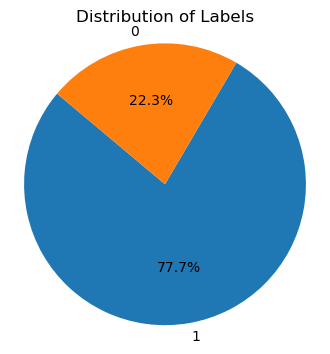

In [67]:
label_counts = combine_df['label'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [76]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

In [77]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\het14\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\het14\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
# Get the list of English stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

In [82]:
# Function to remove punctuation and stop words from text
def remove_punctuation_and_stopwords(text):
    # Check if the text is not NaN
    if isinstance(text, str):
        # Tokenize the text
        tokens = nltk.word_tokenize(text)
        # Remove punctuation and stop words
        tokens = [word for word in tokens if word.lower() not in stop_words and word.lower() not in punctuation]
        # Join the tokens back into a single string
        return ' '.join(tokens)
    else:
        return ''  # Return empty string for NaN values

In [83]:
# Apply the function to the 'text' column of the DataFrame
combined_df['text'] = combined_df['text'].apply(remove_punctuation_and_stopwords)

In [89]:
combined_df['text'] = combined_df['text'].str.lower()

In [101]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

In [94]:
combine_df['tokenized_text'] = combined_df['text'].apply(word_tokenize)

In [95]:
combine_df.head()

,text,label,tokenized_text
0,Envy to other is swallowing me Im from develop...,1,"[speak-no-evil, monkey, honest, globe, showing..."
1,Nothin outta the ordinary. Paradise. Job stres...,1,"[frau, goebbels, early, signs, psychosis, psyc..."
2,Almost 49 and the chasm of emptiness has never...,1,"[lot, work, unfulfilled, tasks, plunge, extrem..."
3,I’m happy again After my closest friend left m...,0,"[private, health, insurance, delivers, value, ..."
4,Is it possible to recover from such a traumati...,1,"[xpertonline, offers, convenience, viewing, pa..."


In [105]:
# Load pre-trained Word2Vec model (assuming 'model' is your pre-trained Word2Vec model)
# If you haven't trained a Word2Vec model yet, you can train one using your tokenized text data
model = Word2Vec(sentences=combine_df['tokenized_text'], vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors to represent the entire text
def text_to_vector(text):
    # Initialize an array to store word vectors
    vectors = []
    for word in text:
        # Check if the word is in the vocabulary of the Word2Vec model
        if word in model.wv:
            vectors.append(model.wv[word])
    # Average the word vectors
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        # If no word vectors are available, return a vector of zeros
        return np.zeros(model.vector_size)

# Apply the function to the 'tokenized_text' column to obtain numerical features
combine_df['word2vec_features'] = combine_df['tokenized_text'].apply(text_to_vector)


In [115]:
from imblearn.over_sampling import SMOTE
import numpy as np

In [109]:
combine_df.head()

,text,label,tokenized_text,word2vec_features
0,Envy to other is swallowing me Im from develop...,1,"[speak-no-evil, monkey, honest, globe, showing...","[-0.0759038, 0.24934357, 0.00076353044, 0.1843..."
1,Nothin outta the ordinary. Paradise. Job stres...,1,"[frau, goebbels, early, signs, psychosis, psyc...","[-0.075905755, 0.18079984, 0.018190555, 0.1283..."
2,Almost 49 and the chasm of emptiness has never...,1,"[lot, work, unfulfilled, tasks, plunge, extrem...","[-0.015742088, 0.23211373, -0.04798914, 0.1658..."
3,I’m happy again After my closest friend left m...,0,"[private, health, insurance, delivers, value, ...","[-0.053679205, 0.30646613, -0.03712701, 0.2264..."
4,Is it possible to recover from such a traumati...,1,"[xpertonline, offers, convenience, viewing, pa...","[-0.07873882, 0.20635778, 0.01077684, 0.149464..."


In [112]:
X = combine_df['word2vec_features'] 
y = combine_df['label']

In [113]:
X = np.vstack(X)  # Assuming 'word2vec_features' is stored as a list of arrays

# Apply SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

In [117]:
resampled_df = pd.DataFrame(X_resampled, columns=[f'feature_{i+1}' for i in range(X_resampled.shape[1])])
resampled_df['label'] = y_resampled

In [120]:
resampled_df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,label
0,-0.075904,0.249344,0.000764,0.184306,-0.086589,-0.374979,0.181133,0.646256,-0.224692,-0.170954,...,0.126009,-0.019515,0.025039,0.505606,0.269243,0.110804,-0.146837,-0.049736,0.040803,1
1,-0.075906,0.180800,0.018191,0.128331,-0.054277,-0.285804,0.133594,0.480485,-0.170011,-0.124421,...,0.073165,-0.008978,0.031578,0.383764,0.206071,0.086276,-0.105943,-0.041802,0.027839,1
2,-0.015742,0.232114,-0.047989,0.165887,-0.135483,-0.305488,0.159577,0.555601,-0.185710,-0.142155,...,0.154511,-0.036310,-0.023574,0.426041,0.207989,0.089835,-0.124613,-0.048678,0.054412,1
3,-0.053679,0.306466,-0.037127,0.226400,-0.250757,-0.454394,0.259243,0.851441,-0.353330,-0.220820,...,0.202494,-0.028210,-0.047392,0.662641,0.310193,0.164388,-0.189935,-0.046943,0.057599,0
4,-0.078739,0.206358,0.010777,0.149465,-0.076332,-0.324850,0.161165,0.559299,-0.197802,-0.144478,...,0.090426,-0.014042,0.029570,0.440442,0.230263,0.102204,-0.117408,-0.044675,0.033637,1


In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [121]:
X = resampled_df.drop('label', axis=1)
y = resampled_df['label']

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5780164245104232


In [124]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.53      0.56       788
           1       0.57      0.62      0.60       795

    accuracy                           0.58      1583
   macro avg       0.58      0.58      0.58      1583
weighted avg       0.58      0.58      0.58      1583

